In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import joblib  # Corrected import for joblib
from google.colab import files

# Step 2: Upload the New Data CSV File for Prediction
print("Upload the CSV file for prediction:")
uploaded_new = files.upload()
new_data = pd.read_csv('/content/drive/MyDrive/air_quality/aqi_levels.csv')  # Change this to the name of your new uploaded file
print(new_data.head())

# Step 3: Preprocess the New Data
X_new = new_data[['CO', 'NO2', 'Ozone', 'SO2']]  # Ensure these feature names match the training data

# Step 4: Load the Trained Model
loaded_model = joblib.load('/content/drive/MyDrive/air_quality/decision_tree_model.pkl')

# Step 5: Make Predictions on New Data
predictions = loaded_model.predict(X_new)

# Step 6: Add Predictions to the New Data
new_data['Predicted_AQI_Level'] = predictions

# Step 7: Save the Predictions to a New CSV File
new_data.to_csv('predictions_output.csv', index=False)
print("Predictions saved to 'predictions_output.csv'")


Upload the CSV file for prediction:


Saving aqi_results .csv to aqi_results  (1).csv
     CO    NO2   Ozone    SO2
0  0.43  29.94   67.24  12.84
1  6.17  54.56   23.91  21.14
2  0.30  16.40  147.99  13.01
3  2.03  62.37   67.27  16.76
4  3.97  66.83   66.53  18.96
Predictions saved to 'predictions_output.csv'


In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import requests
import joblib
from io import StringIO

# Step 2: Download the Data from the URL
url = 'http://myiot.co.in/download.php'  # Replace with the actual URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Data downloaded successfully.")
    # Load the content into a pandas DataFrame
    # If the file is a CSV, use StringIO to read it
    data = StringIO(response.text)
    new_data = pd.read_csv(data)
    print(new_data.head())
else:
    print(f"Failed to download data. Status code: {response.status_code}")

# Step 3: Preprocess the New Data
X_new = new_data[['CO', 'NO2', 'Ozone', 'SO2']]  # Ensure these feature names match the training data

# Step 4: Load the Trained Model
loaded_model = joblib.load('/content/drive/MyDrive/air_quality/decision_tree_model.pkl')  # Ensure this is the correct model file path

# Step 5: Make Predictions on New Data
predictions = loaded_model.predict(X_new)

# Step 6: Add Predictions to the New Data
new_data['Predicted_AQI_Level'] = predictions

# Step 7: Save the Predictions to a New CSV File
new_data.to_csv('predictions_output.csv', index=False)
print("Predictions saved to 'predictions_output.csv'")


Data downloaded successfully.
          Date&Time    CO    NO2  Ozone   SO2  Temp   Hmd
0  12-10-2024 12:44  1.75  13.37   8.39  11.0  28.0  60.0
1  12-10-2024 12:44  2.37  21.81  16.61  22.0  28.0  60.0
2  12-10-2024 12:44  3.07  28.15  23.34  26.0  28.0  60.0
3  12-10-2024 12:44  3.22  23.40  19.19  20.0  28.0  60.0
4  12-10-2024 12:44  3.18  22.17  18.11  13.0  28.0  60.0
Predictions saved to 'predictions_output.csv'


     CO    NO2   Ozone    SO2
0  0.43  29.94   67.24  12.84
1  6.17  54.56   23.91  21.14
2  0.30  16.40  147.99  13.01
3  2.03  62.37   67.27  16.76
4  3.97  66.83   66.53  18.96
Index(['CO', 'NO2', 'Ozone', 'SO2'], dtype='object')


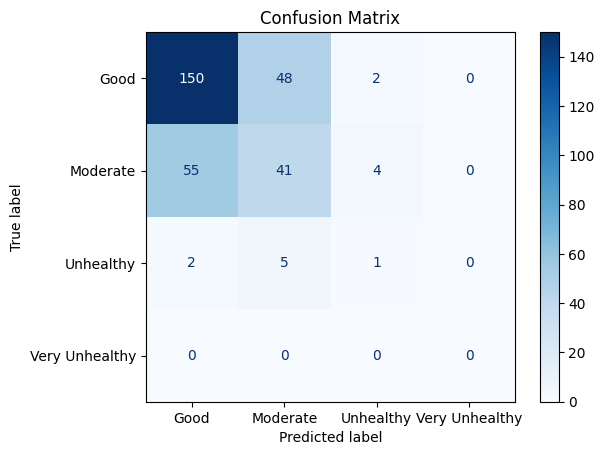

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/air_quality/aqi_levels.csv')

# Display the first few rows and the column names to identify your target
print(df.head())
print(df.columns)

# Assume your target variable is continuous (like AQI)
y = df['Ozone']  # Replace with your actual target column name

# Categorize into four classes (example thresholds)
bins = [0, 50, 100, 150, 200]  # Adjust thresholds as needed
labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy']
y = pd.cut(y, bins=bins, labels=labels)

X = df.drop('Ozone', axis=1)  # Features

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()  # Classifier for categorical target
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(y.value_counts())


Ozone
Good              1016
Moderate           466
Unhealthy           52
Very Unhealthy       5
Name: count, dtype: int64
